In [63]:
import dash
import dash_core_components as dcc
import dash_html_components as html
import time
from collections import deque
import plotly.graph_objs as go
import numpy as np
import pandas as pd
import shapefile as shp
import matplotlib.pyplot as plt
import seaborn as sns
import altair as alt

In [26]:
raw_data = pd.read_csv("raw_data.csv")
state_wise = pd.read_csv("state_wise.csv")
state_codes = pd.read_csv("state_code.csv")

In [28]:
list_state = state_wise[state_wise.Confirmed != 0][1:]
list_state.head()

,State,Confirmed,Recovered,Deaths,Active,Last_Updated_Time,State_code,Delta_Confirmed,Delta_Recovered,Delta_Deaths
1,Maharashtra,490,50,26,414,03-04-2020 21:12,MH,0,0,0
2,Tamil Nadu,411,6,1,404,03-04-2020 17:37,TN,0,0,0
3,Delhi,386,8,6,372,03-04-2020 23:32,DL,0,0,0
4,Kerala,295,42,2,251,03-04-2020 19:07,KL,0,0,0
5,Telangana,229,32,11,186,03-04-2020 20:27,TG,0,0,0


In [55]:
app = dash.Dash('patient-data')
state_list = list(list_state.State)

['Maharashtra',
 'Tamil Nadu',
 'Delhi',
 'Kerala',
 'Telangana',
 'Rajasthan',
 'Uttar Pradesh',
 'Andhra Pradesh',
 'Madhya Pradesh',
 'Karnataka',
 'Gujarat',
 'Jammu and Kashmir',
 'Haryana',
 'West Bengal',
 'Punjab',
 'Bihar',
 'Assam',
 'Odisha',
 'Chandigarh',
 'Uttarakhand',
 'Ladakh',
 'Andaman and Nicobar Islands',
 'Chhattisgarh',
 'Himachal Pradesh',
 'Goa',
 'Puducherry',
 'Jharkhand',
 'Manipur',
 'Mizoram',
 'Arunachal Pradesh']

In [98]:
sns.set(style="whitegrid", palette="pastel", color_codes=True) 
sns.mpl.rc("figure", figsize=(100,60))
    
#opening the vector map
shp_path1="gadm36_IND_shp\\gadm36_IND_1.shp"
#reading the shape file by using reader function of the shape lib
sf = shp.Reader(shp_path1)

print("Length: ",len(sf.shapes()))
#sf1.records()

Length:  36


[Record #0: ['IND', 'India', 'IND.1_1', 'Andaman and Nicobar', 'Andaman & Nicobar Islands|Andaman et Nicobar|Iihas de Andama e Nicobar|Inseln Andamanen und Nikobare', '', 'Union Territor', 'Union Territory', '', 'IN.AN'],
 Record #1: ['IND', 'India', 'IND.2_1', 'Andhra Pradesh', '', '', 'State', 'State', '', 'IN.AP'],
 Record #2: ['IND', 'India', 'IND.3_1', 'Arunachal Pradesh', 'Agence de la Frontière du Nord-Est(French-obsolete)|North East Frontier Agency', '', 'State', 'State', '', 'IN.AR'],
 Record #3: ['IND', 'India', 'IND.4_1', 'Assam', '', '', 'State', 'State', '', 'IN.AS'],
 Record #4: ['IND', 'India', 'IND.5_1', 'Bihar', '', '', 'State', 'State', '', 'IN.BR'],
 Record #5: ['IND', 'India', 'IND.6_1', 'Chandigarh', '', '', 'Union Territor', 'Union Territory', '', 'IN.CH'],
 Record #6: ['IND', 'India', 'IND.7_1', 'Chhattisgarh', '', '', 'State', 'State', '', 'IN.CT'],
 Record #7: ['IND', 'India', 'IND.8_1', 'Dadra and Nagar Haveli', 'DAdra et Nagar Haveli|Dadra e Nagar Haveli', ''

In [76]:
def read_shapefile(sf):
    """
    Read a shapefile into a Pandas dataframe with a 'coords' 
    column holding the geometry information. This uses the pyshp
    package
    """
    fields = [x[0] for x in sf.fields][1:]
    records = sf.records()
    shps = [s.points for s in sf.shapes()]
    df = pd.DataFrame(columns=fields, data=records)
    df = df.assign(coords=shps)
    return df

In [92]:
df = read_shapefile(sf)
df.shape

(36, 11)

In [96]:
sf.records()[1][4]

''

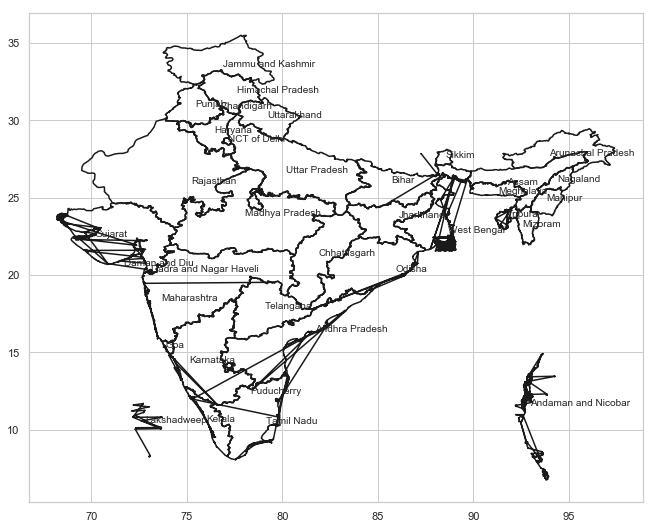

In [112]:
def plot_map(sf, x_lim = None, y_lim = None, figsize = (11,9)):
    '''
    Plot map with lim coordinates
    '''
    plt.figure(figsize = figsize)
    id=0
    for shape in sf.shapeRecords():
        x = [i[0] for i in shape.shape.points[:]]
        y = [i[1] for i in shape.shape.points[:]]
        plt.plot(x, y, 'k')
        
        if (x_lim == None) & (y_lim == None):
            x0 = np.mean(x)
            y0 = np.mean(y)
            plt.text(x0, y0, sf.records()[id][3], fontsize=10)
        id = id+1
    
    if (x_lim != None) & (y_lim != None):     
        plt.xlim(x_lim)
        plt.ylim(y_lim)
    return sf
        
plot_map(sf)



In [100]:
city = pd.read_csv('worldcities.csv')
city = city[city.country == 'India']
city.head()

,city,city_ascii,lat,lng,country,iso2,iso3,admin_name,capital,population,id
3,Mumbai,Mumbai,19.017,72.8570,India,IN,IND,Mahārāshtra,admin,18978000.0,1356226629
5,Delhi,Delhi,28.670,77.2300,India,IN,IND,Delhi,admin,15926000.0,1356872604
7,Kolkata,Kolkata,22.495,88.3247,India,IN,IND,West Bengal,admin,14787000.0,1356060520
34,Chennai,Chennai,13.090,80.2800,India,IN,IND,Tamil Nādu,admin,7163000.0,1356374944
36,Bengalūru,Bengaluru,12.970,77.5600,India,IN,IND,Karnātaka,admin,6787000.0,1356410365


(66.7248031625, 98.8766067475, 5.316901992, 36.938685108)

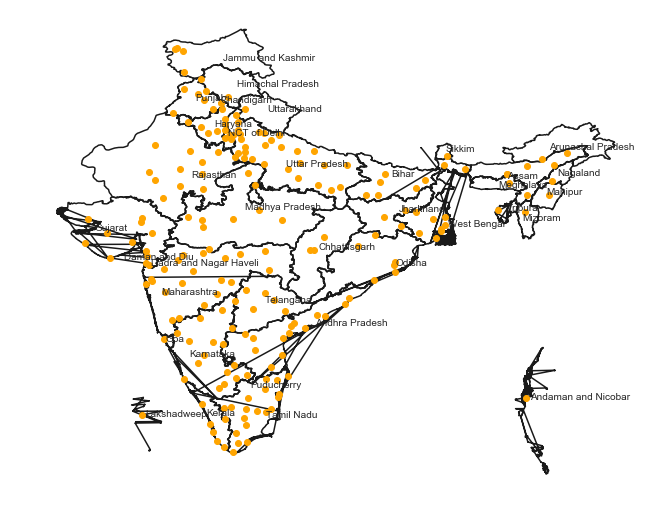

In [101]:
plot_map(sf)

plt.plot(city['lng'],city['lat'],'o', color="orange")
plt.axis('off')

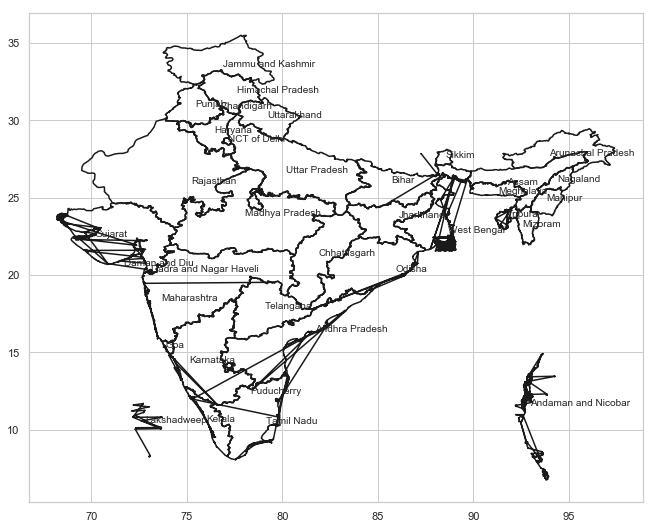

In [107]:
app.layout = html.Div([
    html.Div([
        html.H2('COVID-19 Patient Data',
                style={'float': 'left',
                       }),
        ]),
    dcc.Dropdown(id='state-list',
                 options=[{'label': s, 'value': s}
                          for s in state_list],
                 value=state_list,
                 multi=False
                 ),
    html.Div(children=html.Div(id='map'), className='row'),
    dcc.Graph(
        id='map_india',
            animate=True,
            figure={'data': plot_map(sf)})
            
    ], className="container",style={'width':'30%','margin-left':10,'margin-right':10,'max-width':50000})

In [113]:
if __name__ == "__main__":
    app.run_server(debug=False)

 * Serving Flask app "patient-data" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


In [125]:
df = pd.DataFrame({'mass': [0.330, 4.87 , 5.97],
                   'radius': [2439.7, 6051.8, 6378.1]},
                  index=['Mercury', 'Venus', 'Earth'])
df

,mass,radius
Mercury,0.33,2439.7
Venus,4.87,6051.8
Earth,5.97,6378.1


In [117]:
x = pd.read_csv('state_wise_data.csv')
x.head()

,Values,Andaman and Nicobar Islands,Andhra Pradesh,Arunachal Pradesh,Assam,Bihar,Chandigarh,Chhattisgarh,Dadra and Nagar Haveli,Daman and Diu,...,Sikkim,Tamil Nadu,Telangana,Total,Tripura,Uttar Pradesh,Uttarakhand,West Bengal,(blank),Grand Total
0,Recovered,0,2,0,0,3,0,3,0,0,...,0,6,32,229,0,17,2,3,NaN,458
1,Deaths,0,1,0,0,1,0,0,0,0,...,0,1,11,86,0,2,0,6,NaN,172
2,Active,10,161,1,24,27,18,6,0,0,...,0,404,186,2812,0,155,14,44,NaN,5624


In [123]:
x.plot.pie(y='Tamil Nadu', figsize=(5, 5), x=Values)


NameError: name 'Values' is not defined